<a href="https://colab.research.google.com/github/mahevishh/projects/blob/main/multimedia_ai_generation_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projext - 1 (Text to Image)

In [ ]:
#! pip install diffusers --upgrade

In [ ]:
# ! pip install invisible_watermark transformers accelerate safetensors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "a butterfly in the galaxy"

images = pipe(prompt=prompt).images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

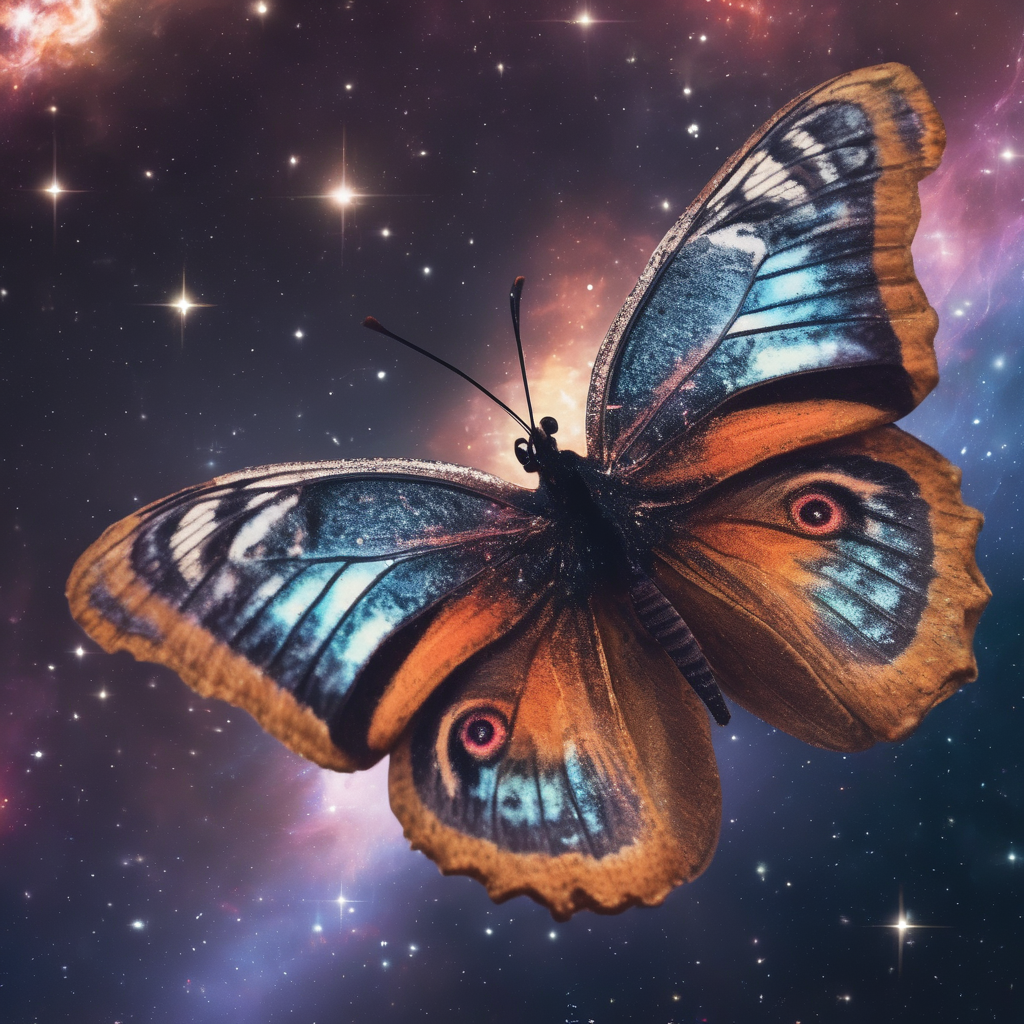

In [ ]:
images

In [ ]:
#! pip install gradio

In [ ]:
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)


(True, 'Tesla T4')

In [4]:
import gradio as gr
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-v1-5"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

def generated_image(prompt):
    image = pipe(prompt).images[0]
    return image

gr.Interface(
    fn=generated_image,
    inputs=gr.Textbox(label="Enter your prompt"),
    outputs=gr.Image(type="pil"),
    title="Stable Diffusion 1.5 - Shora Mahevish IMAGE GENERATOR APP",
    description="Enter text prompt and see the generated image"
).launch()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2d95cf24bc3b93192f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [12]:
!nvidia-smi

Fri Nov 14 08:37:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P0             29W /   70W |   12394MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Project 2 - Text prompt to audio generator

In [6]:
from huggingface_hub import notebook_login
notebook_login()

In [10]:
pip install torchsde

In [10]:
import torch
import soundfile as sf
from diffusers import StableAudioPipeline

pipe = StableAudioPipeline.from_pretrained("stabilityai/stable-audio-open-1.0", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# define the prompts
prompt = "A mystical choir-like sparkly voice with shimmering harmonics, gentle echo, and a magical aura. Light rain mist falling in the background, soft droplets, dreamy atmosphere."
negative_prompt = "Low quality."

# set the seed for generator
generator = torch.Generator("cuda").manual_seed(0)

# run the generation
audio = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=200,
    audio_end_in_s=10.0,
    num_waveforms_per_prompt=3,
    generator=generator,
).audios

output = audio[0].T.float().cpu().numpy()
sf.write("magical.wav", output, pipe.vae.sampling_rate)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

In [11]:
import IPython.display as ipd
ipd.Audio("magical.wav")


## Project 3 - Text prompt to video generator

In [13]:
!pip install git+https://github.com/huggingface/diffusers.git
!pip install transformers accelerate torch

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-97czdji2
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-97czdji2
  Resolved https://github.com/huggingface/diffusers.git to commit eeae0338e7ad2b3749eac0c8701ec250a1884844
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4452349 sha256=94ae7000064189d3f5a16c93d66f5efe8eb906e8c81f98c7fde8a9b2b553afb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-19k8_fze/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.0
    Uninstalling diffusers-0.30.0:
      Successfully uninstalled diffusers-0.30.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [diffusers

In [18]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
import numpy as np # Import numpy
import imageio # Import imageio

pipe = DiffusionPipeline.from_pretrained("cerspense/zeroscope_v2_576w", torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()
pipe.unet.enable_forward_chunking(chunk_size=1, dim=1) # disable if enough memory as this slows down significantly

prompt = "butterfly flaying on the galaxy"
video_frames = pipe(prompt, num_inference_steps=40, height=320, width=576, num_frames=36).frames

# Convert the video frames to uint8 format and remove the batch dimension (the first dimension)
video_frames = (video_frames[0] * 255).astype(np.uint8)

# Manually export to video using imageio
output_video_path = "output.mp4"
fps = 10 # You can adjust the frame rate as needed

with imageio.get_writer(output_video_path, fps=fps) as writer:
    for frame in video_frames:
        # Each frame should now have the shape (height, width, channels)
        writer.append_data(frame)

video_path = output_video_path # Update video_path to the path of the manually created video

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The TextToVideoSDPipeline has been deprecated and will not receive bug fixes or feature updates after 

  0%|          | 0/40 [00:00<?, ?it/s]

In [19]:
from IPython.display import Video, display

display(Video(output_video_path, embed=True))


## project 4 - image to video generator

In [21]:

!pip install -q -U diffusers transformers accelerate

In [23]:
from google.colab import files
uploaded = files.upload()


Saving Iridescent Jellyfish 🪼.jpg to Iridescent Jellyfish 🪼.jpg


In [4]:
from diffusers import StableVideoDiffusionPipeline
import torch
from PIL import Image

pipe = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt",
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")

# Only keep this (supported)
pipe.enable_model_cpu_offload()

# Load your jellyfish image
input_image = Image.open("/content/jellyfish.jpg")  # change to your image name
input_image = input_image.convert("RGB")

frames = pipe(
    input_image,
    num_frames=25,
    decode_chunk_size=8,
).frames[0]

import imageio
imageio.mimsave("jellyfish_video.mp4", frames, fps=7)


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [6]:
from IPython.display import Video
Video("jellyfish_video.mp4", embed=True)
